In [ ]:
 import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.layers import BatchNormalization,SeparableConv2D,Dense,MaxPooling2D,Activation,Flatten,Dropout

In [ ]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk('/content/drive/MyDrive/Dataset_Futura/archive (6)/Fire-Detection/0'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[0]]).toarray())

In [ ]:

paths=[]

for r,d,f in os.walk('/content/drive/MyDrive/Dataset_Futura/archive (6)/Fire-Detection/1'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[1]]).toarray())

In [ ]:
data=np.array(data)
print(data.shape)
result=np.array(result)
result=result.reshape(624,2)
print(result.shape)

(624, 128, 128, 3)
(624, 2)


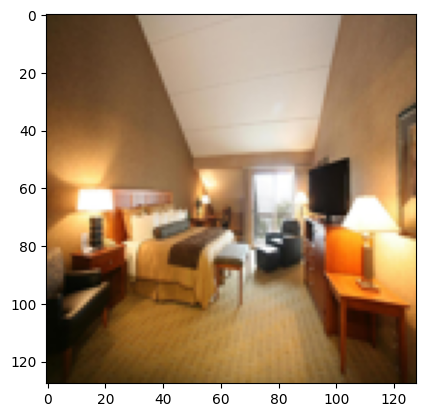

In [ ]:
plt.imshow(data[7])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=.2,shuffle=True)

In [ ]:
model=Sequential()

model.add(SeparableConv2D(16,(7,7),padding="same",input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 128, 128, 16)      211       
 eConv2D)                                                        
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 separable_conv2d_1 (Separa  (None, 64, 64, 32)        688       
 bleConv2D)                                             

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(499, 128, 128, 3)
(499, 2)


In [ ]:

history=model.fit(xtrain,ytrain,verbose=1,epochs=30,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/30
8/8 [==============================] - 24s 3s/step - loss: 0.8602 - accuracy: 0.6313 - val_loss: 0.6603 - val_accuracy: 0.7920
Epoch 2/30
8/8 [==============================] - 21s 3s/step - loss: 0.7274 - accuracy: 0.7054 - val_loss: 0.5818 - val_accuracy: 0.8000
Epoch 3/30
8/8 [==============================] - 21s 3s/step - loss: 0.6702 - accuracy: 0.7575 - val_loss: 0.5560 - val_accuracy: 0.8000
Epoch 4/30
8/8 [==============================] - 20s 3s/step - loss: 0.5951 - accuracy: 0.7655 - val_loss: 0.5541 - val_accuracy: 0.8000
Epoch 5/30
8/8 [==============================] - 21s 3s/step - loss: 0.5456 - accuracy: 0.8277 - val_loss: 0.5568 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 20s 3s/step - loss: 0.4630 - accuracy: 0.8477 - val_loss: 0.5547 - val_accuracy: 0.8000
Epoch 7/30
8/8 [==============================] - 21s 3s/step - loss: 0.4275 - accuracy: 0.8577 - val_loss: 0.5378 - val_accuracy: 0.8080
Epoch 8/30
8/8 [==================

In [ ]:
score=model.evaluate(xtest,ytest,batch_size=64)

2/2 [==============================] - 3s 1s/step - loss: 0.4101 - accuracy: 0.8480


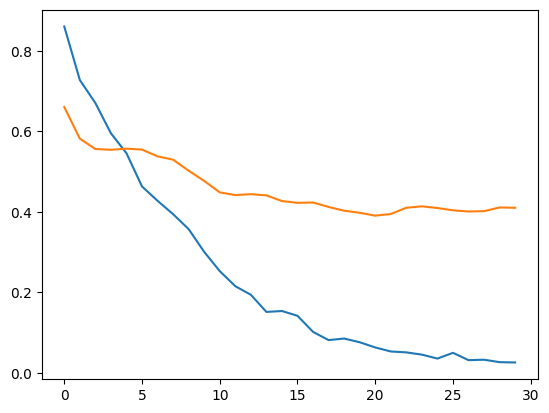

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



In [ ]:
def detection(num):
  if(num==0):
    return "Non-Fire"
  else:
    return "Fire"

64.96718525886536%this isNon-Fire


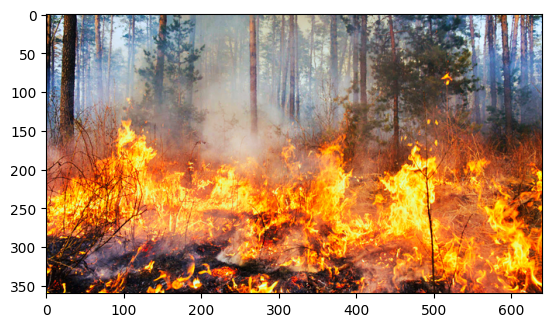

In [ ]:
img=Image.open('/content/drive/MyDrive/Dataset_Futura/archive (6)/Fire-Detection/1/108.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(str(res[0][classification]*100)+'%this is'+detection(classification))

99.97969269752502%this isNon-Fire


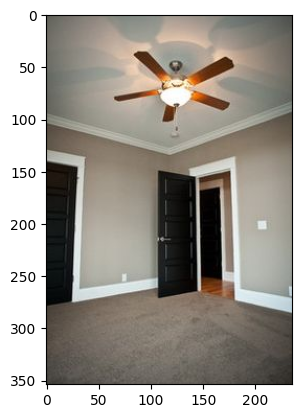

In [ ]:
img=Image.open('/content/drive/MyDrive/Dataset_Futura/archive (6)/Fire-Detection/0/108.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(str(res[0][classification]*100)+'%this is'+detection(classification))